# **Import Library**

In [13]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import PIL.Image
import time
import functools
import matplotlib.pyplot as plt

# **Convert Tensor to Image**

In [14]:
def tensor_to_image(tensor):
  tensor = tensor*255
  tensor = np.array(tensor, dtype=np.uint8)
  if np.ndim(tensor)>3:
    assert tensor.shape[0] == 1
    tensor = tensor[0]
  return PIL.Image.fromarray(tensor)

# **Convert Image to Tensor**

In [15]:
def image_to_tensor(path_to_img):
    img = tf.io.read_file(path_to_img)
    img = tf.image.decode_image(img, channels=3, dtype=tf.float32)
    
    img = tf.image.resize(img, [512, 512])
    img = img[tf.newaxis, :]
    return img

# **Import Image**

In [16]:
kucing_tensor = image_to_tensor("/content/andriyko-podilnyk-RCfi7vgJjUY-unsplash.jpg")
style_tensor = image_to_tensor("/content/pexels-anni-roenkae-2868948.jpg")

# **Show Image**

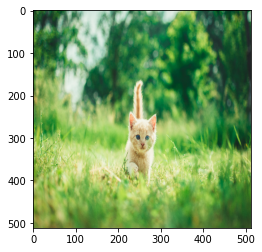

In [17]:
plt.imshow(tensor_to_image(kucing_tensor))

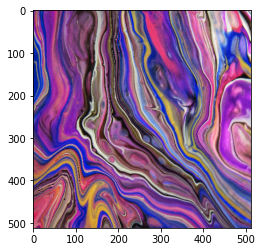

In [18]:
plt.imshow(tensor_to_image(style_tensor))

# **Result From Style Transfer**

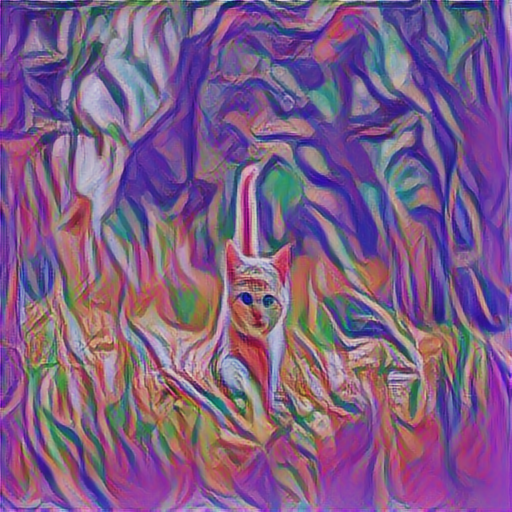

In [19]:
hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/1')
stylized_image = hub_module(tf.constant(kucing_tensor), tf.constant(style_tensor))[0]
tensor_to_image(stylized_image)